In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers

In [ ]:
(train_data, train_label), (test_data, test_lebel) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [ ]:
class_name = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

In [ ]:
train_data = train_data.reshape(train_data.shape[0], -1)
test_data = test_data.reshape(test_data.shape[0], -1)

In [ ]:
def show_img(x, y, index):
    temp = x[index]
    plt.imshow(temp, cmap=plt.cm.binary, interpolation='nearest')
    temp1 = y[index][0]
    plt.xlabel(class_name[temp1])
    plt.grid(False)
    plt.show()

In [ ]:
show_img(train_data,train_label,0)

In [ ]:
train_data, test_data = train_data / 255.0, test_data / 255.0

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape = (32,32,3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 256)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 256)         590080    
                                                                 
 flatten (Flatten)           (None, 4096)              0

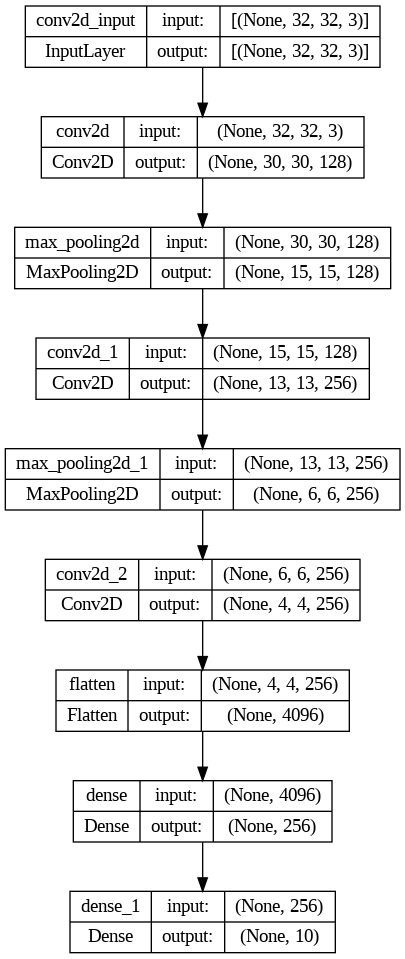

In [ ]:
tf.keras.utils.plot_model(model,to_file="model.png",show_shapes=True)

In [ ]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy']
              )

In [ ]:
compileation = model.fit(train_data,train_label,epochs=10)

In [ ]:
test_acc ,test_loss= model.evaluate(test_data,test_lebel)

In [ ]:
prediction = model.predict(test_data)

In [ ]:
index = int(input("Enter The Index:"))
predicted_label = tf.argmax(tf.nn.softmax(prediction[index])).numpy()
show_img(test_data,test_lebel,index)